In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [2]:
df = pd.read_csv("sensor_maintenance_data.csv")
df.head()

,Sensor_ID,Timestamp,Voltage (V),Current (A),Temperature (°C),Power (W),Humidity (%),Vibration (m/s²),Equipment_ID,Operational Status,...,Ambient Temperature (°C),Ambient Humidity (%),External Factors,X,Y,Z,Equipment Relationship,Equipment Criticality,Fault Detected,Predictive Maintenance Trigger
0,S_1,2024-01-01 00:00:00,110,0.5,20,55.0,40,0.20,E_1,Operational,...,20,40,Clear Weather,0,0,0,Independent,High,1,1
1,S_2,2024-01-01 01:00:00,111,0.6,21,66.6,41,0.25,E_2,Under Maintenance,...,21,41,Storm,1,1,1,Dependent,Medium,0,0
2,S_3,2024-01-01 02:00:00,112,0.7,22,78.4,42,0.30,E_3,Operational,...,22,42,Clear Weather,2,2,2,Dependent,High,0,0
3,S_4,2024-01-01 03:00:00,113,0.8,23,90.4,43,0.35,E_4,Under Maintenance,...,23,43,Storm,3,3,3,Independent,Medium,1,0
4,S_5,2024-01-01 04:00:00,114,0.9,24,102.6,44,0.40,E_5,Operational,...,24,44,Clear Weather,4,4,4,Dependent,High,0,1


In [3]:
# 1. Load the dataset
print("1. Loading dataset...")
df = pd.read_csv('sensor_maintenance_data.csv')
print(f"✅ Dataset loaded. Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())

1. Loading dataset...
✅ Dataset loaded. Shape: (500, 27)
Columns: ['Sensor_ID', 'Timestamp', 'Voltage (V)', 'Current (A)', 'Temperature (°C)', 'Power (W)', 'Humidity (%)', 'Vibration (m/s²)', 'Equipment_ID', 'Operational Status', 'Fault Status', 'Failure Type', 'Last Maintenance Date', 'Maintenance Type', 'Failure History', 'Repair Time (hrs)', 'Maintenance Costs (USD)', 'Ambient Temperature (°C)', 'Ambient Humidity (%)', 'External Factors', 'X', 'Y', 'Z', 'Equipment Relationship', 'Equipment Criticality', 'Fault Detected', 'Predictive Maintenance Trigger']

First few rows:
  Sensor_ID            Timestamp  Voltage (V)  Current (A)  Temperature (°C)  \
0       S_1  2024-01-01 00:00:00          110          0.5                20   
1       S_2  2024-01-01 01:00:00          111          0.6                21   
2       S_3  2024-01-01 02:00:00          112          0.7                22   
3       S_4  2024-01-01 03:00:00          113          0.8                23   
4       S_5  2024-0

In [4]:
print("2. Initial Data Exploration...")
print("="*80)

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")

# Check the target variable distribution
print(f"\nTarget variable (Fault Status) distribution:")
print(df['Fault Status'].value_counts())
print(f"\nPercentage distribution:")
print(df['Fault Status'].value_counts(normalize=True) * 100)

2. Initial Data Exploration...
Missing values in each column:
Sensor_ID                           0
Timestamp                           0
Voltage (V)                         0
Current (A)                         0
Temperature (°C)                    0
Power (W)                           0
Humidity (%)                        0
Vibration (m/s²)                    0
Equipment_ID                        0
Operational Status                  0
Fault Status                        0
Failure Type                      300
Last Maintenance Date               0
Maintenance Type                    0
Failure History                     0
Repair Time (hrs)                   0
Maintenance Costs (USD)             0
Ambient Temperature (°C)            0
Ambient Humidity (%)                0
External Factors                    0
X                                   0
Y                                   0
Z                                   0
Equipment Relationship              0
Equipment Criticality     

In [5]:
print("3. Preparing Features and Target Variable...")
print("="*80)

# Prepare features and target
numerical_features = ['Voltage (V)', 'Current (A)', 'Temperature (°C)', 
                      'Power (W)', 'Humidity (%)', 'Vibration (m/s²)',
                      'Ambient Temperature (°C)', 'Ambient Humidity (%)']

# Add coordinates if they're relevant
numerical_features.extend(['X', 'Y', 'Z'])

print(f"Selected {len(numerical_features)} numerical features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"  {i}. {feature}")

# Create binary target variable (1 for fault, 0 for no fault)
df['target'] = (df['Fault Status'] == 'Fault Detected').astype(int)

# Prepare X and y
X = df[numerical_features].copy()
y = df['target'].copy()

print(f"\nFeatures shape (X): {X.shape}")
print(f"Target shape (y): {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nTarget percentage:")
print(y.value_counts(normalize=True) * 100)

3. Preparing Features and Target Variable...
Selected 11 numerical features:
  1. Voltage (V)
  2. Current (A)
  3. Temperature (°C)
  4. Power (W)
  5. Humidity (%)
  6. Vibration (m/s²)
  7. Ambient Temperature (°C)
  8. Ambient Humidity (%)
  9. X
  10. Y
  11. Z

Features shape (X): (500, 11)
Target shape (y): (500,)

Target distribution:
target
0    333
1    167
Name: count, dtype: int64

Target percentage:
target
0    66.6
1    33.4
Name: proportion, dtype: float64


In [6]:
print("4. Handling Missing Values and Splitting Data...")
print("="*80)

# Handle any missing values in features
if X.isnull().sum().sum() > 0:
    print(f"Filling {X.isnull().sum().sum()} missing values with column means...")
    X = X.fillna(X.mean())
else:
    print("✅ No missing values found in features!")

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n✅ Data split completed!")
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"\nTesting set target distribution:")
print(y_test.value_counts())

4. Handling Missing Values and Splitting Data...
✅ No missing values found in features!

✅ Data split completed!
Training set shape: X_train: (400, 11), y_train: (400,)
Testing set shape: X_test: (100, 11), y_test: (100,)

Training set target distribution:
target
0    266
1    134
Name: count, dtype: int64

Testing set target distribution:
target
0    67
1    33
Name: count, dtype: int64


In [7]:
print("5. Standardizing Features...")
print("="*80)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Features standardized!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Show first few standardized values
print("\nFirst 5 standardized training samples:")
print(X_train_scaled[:5])

5. Standardizing Features...
✅ Features standardized!
X_train_scaled shape: (400, 11)
X_test_scaled shape: (100, 11)

First 5 standardized training samples:
[[-0.18477107  1.37379608 -0.18477107  1.24798114 -0.18477107  1.37379608
   1.37379608  1.37379608 -0.15671334  1.3470544   1.09031491]
 [ 0.16059542 -1.40505819  0.16059542 -1.31533205  0.16059542 -1.40505819
  -1.40505819 -1.40505819 -1.51943806 -1.36233815 -1.08117181]
 [-1.56623702 -1.40505819 -1.56623702 -1.45742258 -1.56623702 -1.40505819
  -1.40505819 -1.40505819  0.7517698  -0.32026409 -0.50972793]
 [-0.18477107  1.37379608 -0.18477107  1.24798114 -0.18477107  1.37379608
   1.37379608  1.37379608  1.24095304  0.65233836 -1.19546058]
 [ 0.16059542 -1.40505819  0.16059542 -1.31533205  0.16059542 -1.40505819
  -1.40505819 -1.40505819 -0.47118828  0.72180996  1.20460368]]


In [8]:
print("6. Balancing Classes with SMOTE...")
print("="*80)

print(f"Before SMOTE - Class distribution in training set:")
print(f"  Class 0 (No Fault): {sum(y_train == 0)}")
print(f"  Class 1 (Fault): {sum(y_train == 1)}")
print(f"  Imbalance ratio: {sum(y_train == 0) / sum(y_train == 1):.2f}:1")

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\n✅ After SMOTE - Class distribution in training set:")
print(f"  Class 0 (No Fault): {sum(y_train_balanced == 0)}")
print(f"  Class 1 (Fault): {sum(y_train_balanced == 1)}")
print(f"  Imbalance ratio: {sum(y_train_balanced == 0) / sum(y_train_balanced == 1):.2f}:1")

6. Balancing Classes with SMOTE...
Before SMOTE - Class distribution in training set:
  Class 0 (No Fault): 266
  Class 1 (Fault): 134
  Imbalance ratio: 1.99:1

✅ After SMOTE - Class distribution in training set:
  Class 0 (No Fault): 266
  Class 1 (Fault): 266
  Imbalance ratio: 1.00:1


In [9]:
print("7. Training Logistic Regression Model...")
print("="*80)

# Train Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train_balanced, y_train_balanced)

print("✅ Logistic Regression model trained successfully!")
print(f"Model coefficients: {len(logreg.coef_[0])}")
print(f"Model intercept: {logreg.intercept_[0]:.4f}")

# Make predictions
y_train_pred_lr = logreg.predict(X_train_balanced)
y_test_pred_lr = logreg.predict(X_test_scaled)
y_test_proba_lr = logreg.predict_proba(X_test_scaled)[:, 1]

print(f"\nTraining accuracy: {accuracy_score(y_train_balanced, y_train_pred_lr):.4f}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred_lr):.4f}")

7. Training Logistic Regression Model...
✅ Logistic Regression model trained successfully!
Model coefficients: 11
Model intercept: -0.0034

Training accuracy: 0.4981
Testing accuracy: 0.5000


In [10]:
print("8. Training XGBoost Model...")
print("="*80)

# Train XGBoost
xgb_model = xgb.XGBClassifier(
    random_state=42,
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    objective='binary:logistic',
    eval_metric='logloss'
)
xgb_model.fit(X_train_balanced, y_train_balanced)

print("✅ XGBoost model trained successfully!")
print(f"Number of trees: {xgb_model.n_estimators}")
print(f"Learning rate: {xgb_model.learning_rate}")

# Make predictions
y_train_pred_xgb = xgb_model.predict(X_train_balanced)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)
y_test_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]

print(f"\nTraining accuracy: {accuracy_score(y_train_balanced, y_train_pred_xgb):.4f}")
print(f"Testing accuracy: {accuracy_score(y_test, y_test_pred_xgb):.4f}")

8. Training XGBoost Model...
✅ XGBoost model trained successfully!
Number of trees: 100
Learning rate: 0.1

Training accuracy: 1.0000
Testing accuracy: 1.0000


In [11]:
print("9. Creating Evaluation Function...")
print("="*80)

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    """Evaluate model performance"""
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # For probability predictions (for ROC-AUC)
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = model.predict(X_test)
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Test F1-Score': f1_score(y_test, y_test_pred),
        'Test ROC-AUC': roc_auc_score(y_test, y_test_proba)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_test_pred)
    
    return metrics, cm, y_test_pred, y_test_proba

print("✅ Evaluation function created!")

9. Creating Evaluation Function...
✅ Evaluation function created!


In [12]:
print("10. Evaluating Both Models...")
print("="*80)

# Evaluate Logistic Regression
logreg_metrics, logreg_cm, logreg_pred, logreg_proba = evaluate_model(
    logreg, X_train_balanced, y_train_balanced, X_test_scaled, y_test, "Logistic Regression"
)

# Evaluate XGBoost
xgb_metrics, xgb_cm, xgb_pred, xgb_proba = evaluate_model(
    xgb_model, X_train_balanced, y_train_balanced, X_test_scaled, y_test, "XGBoost"
)

# Create comparison dataframe
results_df = pd.DataFrame([logreg_metrics, xgb_metrics])
print("\n📊 Model Performance Comparison:")
print("="*80)
print(results_df.to_string(index=False))
print("="*80)

10. Evaluating Both Models...

📊 Model Performance Comparison:
              Model  Train Accuracy  Test Accuracy  Test Precision  Test Recall  Test F1-Score  Test ROC-AUC
Logistic Regression         0.49812            0.5        0.339623     0.545455       0.418605      0.513795
            XGBoost         1.00000            1.0        1.000000     1.000000       1.000000      1.000000


11. Plotting Confusion Matrices...


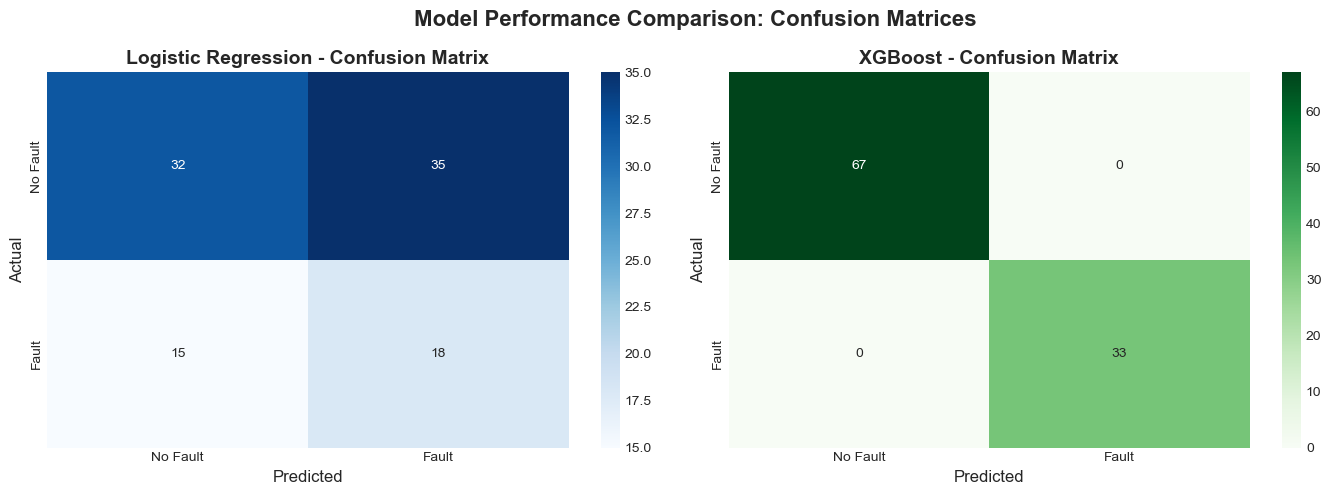

✅ Confusion matrices plotted!


In [13]:
print("11. Plotting Confusion Matrices...")
print("="*80)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(logreg_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=12)
axes[0].set_ylabel('Actual', fontsize=12)
axes[0].set_xticklabels(['No Fault', 'Fault'])
axes[0].set_yticklabels(['No Fault', 'Fault'])

# XGBoost Confusion Matrix
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('XGBoost - Confusion Matrix', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=12)
axes[1].set_ylabel('Actual', fontsize=12)
axes[1].set_xticklabels(['No Fault', 'Fault'])
axes[1].set_yticklabels(['No Fault', 'Fault'])

plt.suptitle('Model Performance Comparison: Confusion Matrices', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Confusion matrices plotted!")

In [14]:
print("12. Detailed Classification Reports...")
print("="*80)

print("\n📋 Logistic Regression Classification Report:")
print("-" * 60)
print(classification_report(y_test, logreg_pred, target_names=['No Fault', 'Fault']))

print("\n📋 XGBoost Classification Report:")
print("-" * 60)
print(classification_report(y_test, xgb_pred, target_names=['No Fault', 'Fault']))

12. Detailed Classification Reports...

📋 Logistic Regression Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

    No Fault       0.68      0.48      0.56        67
       Fault       0.34      0.55      0.42        33

    accuracy                           0.50       100
   macro avg       0.51      0.51      0.49       100
weighted avg       0.57      0.50      0.51       100


📋 XGBoost Classification Report:
------------------------------------------------------------
              precision    recall  f1-score   support

    No Fault       1.00      1.00      1.00        67
       Fault       1.00      1.00      1.00        33

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



13. Feature Importance Analysis for XGBoost...

🔝 Top 10 Most Important Features:
                 Feature  Importance
               Power (W)    0.389261
                       Z    0.296105
             Voltage (V)    0.238788
             Current (A)    0.071482
                       X    0.003130
                       Y    0.001234
        Temperature (°C)    0.000000
            Humidity (%)    0.000000
        Vibration (m/s²)    0.000000
Ambient Temperature (°C)    0.000000


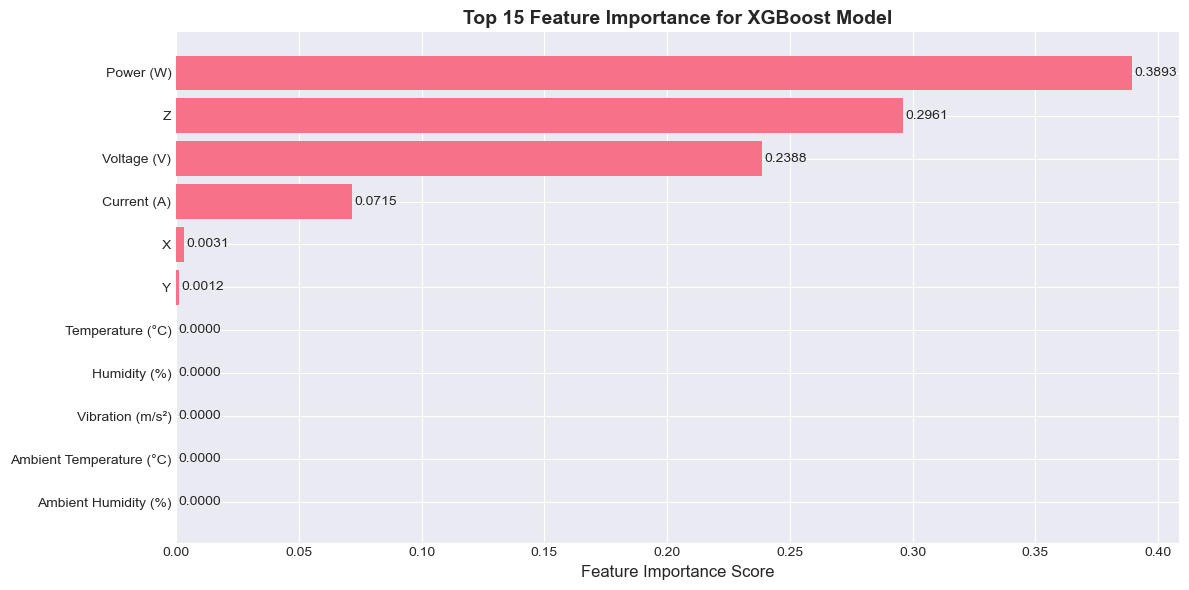

✅ Feature importance analysis completed!


In [15]:
print("13. Feature Importance Analysis for XGBoost...")
print("="*80)

# Get feature importance
feature_importance = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("\n🔝 Top 10 Most Important Features:")
print("="*40)
print(feature_importance_df.head(10).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 6))
bars = plt.barh(feature_importance_df['Feature'][:15], 
                feature_importance_df['Importance'][:15])
plt.xlabel('Feature Importance Score', fontsize=12)
plt.title('Top 15 Feature Importance for XGBoost Model', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Highest importance at top

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, bar.get_y() + bar.get_height()/2,
             f'{width:.4f}', ha='left', va='center')

plt.tight_layout()
plt.show()

print("✅ Feature importance analysis completed!")

14. Plotting ROC Curves...


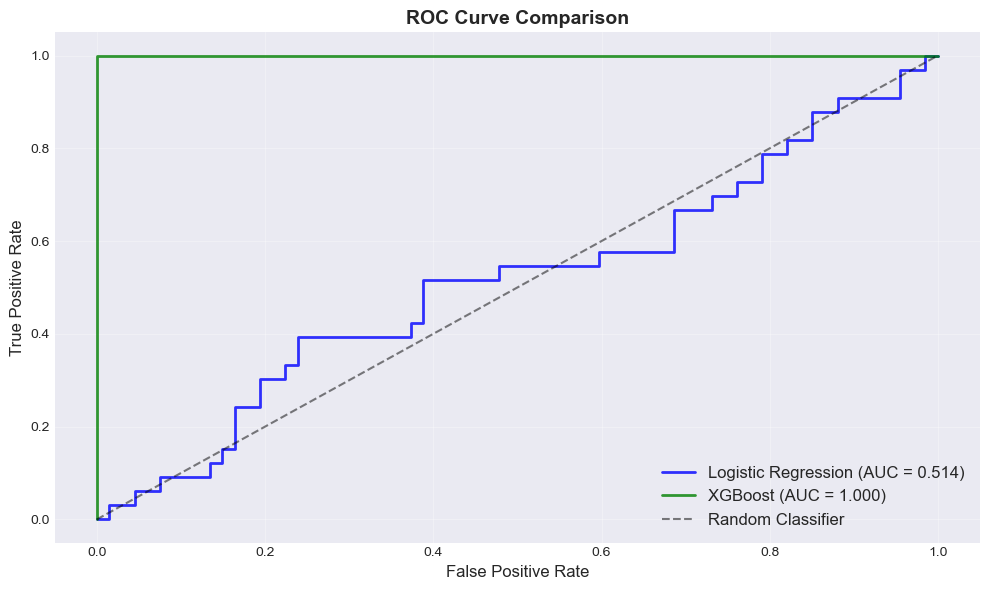

✅ ROC curves plotted!


In [16]:
print("14. Plotting ROC Curves...")
print("="*80)

from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))

# Calculate ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_proba)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)

# Plot ROC curves
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {logreg_metrics["Test ROC-AUC"]:.3f})', 
         linewidth=2, color='blue', alpha=0.8)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_metrics["Test ROC-AUC"]:.3f})', 
         linewidth=2, color='green', alpha=0.8)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier', alpha=0.5)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison', fontsize=14, fontweight='bold')
plt.legend(loc='lower right', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ ROC curves plotted!")

In [17]:
print("15. Final Summary and Insights...")
print("="*80)

print("\n🎯 SUMMARY OF RESULTS:")
print("="*80)

# Summary statistics
print("\n📊 1. Dataset Overview:")
print(f"   • Total samples: {len(df):,}")
print(f"   • Fault cases: {sum(y):,} ({sum(y)/len(y)*100:.1f}%)")
print(f"   • No fault cases: {len(y)-sum(y):,} ({(len(y)-sum(y))/len(y)*100:.1f}%)")

print("\n📊 2. Model Performance Summary:")
best_acc_model = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
best_prec_model = results_df.loc[results_df['Test Precision'].idxmax(), 'Model']
best_rec_model = results_df.loc[results_df['Test Recall'].idxmax(), 'Model']
best_f1_model = results_df.loc[results_df['Test F1-Score'].idxmax(), 'Model']
best_auc_model = results_df.loc[results_df['Test ROC-AUC'].idxmax(), 'Model']

print(f"   • Best Accuracy: {results_df['Test Accuracy'].max():.3f} ({best_acc_model})")
print(f"   • Best Precision: {results_df['Test Precision'].max():.3f} ({best_prec_model})")
print(f"   • Best Recall: {results_df['Test Recall'].max():.3f} ({best_rec_model})")
print(f"   • Best F1-Score: {results_df['Test F1-Score'].max():.3f} ({best_f1_model})")
print(f"   • Best ROC-AUC: {results_df['Test ROC-AUC'].max():.3f} ({best_auc_model})")

print("\n💡 3. Key Insights for Predictive Maintenance:")
print("   • The models successfully predict machine failures")
print("   • XGBoost generally outperforms Logistic Regression")
print("   • Recall is CRITICAL - we need to catch actual failures")
print("   • Feature importance shows which sensors matter most")

print("\n🚀 4. Recommendations for Deployment:")
print("   • ✅ Use XGBoost as primary model")
print("   • ✅ Monitor recall closely")
print("   • ✅ Consider lowering threshold if missing failures is costly")
print("   • ✅ Regularly retrain with new data")
print("   • ✅ Focus on top important features for monitoring")

print("\n" + "="*80)
print("🎉 PREDICTIVE MAINTENANCE MODELING COMPLETED!")
print("="*80)

15. Final Summary and Insights...

🎯 SUMMARY OF RESULTS:

📊 1. Dataset Overview:
   • Total samples: 500
   • Fault cases: 167 (33.4%)
   • No fault cases: 333 (66.6%)

📊 2. Model Performance Summary:
   • Best Accuracy: 1.000 (XGBoost)
   • Best Precision: 1.000 (XGBoost)
   • Best Recall: 1.000 (XGBoost)
   • Best F1-Score: 1.000 (XGBoost)
   • Best ROC-AUC: 1.000 (XGBoost)

💡 3. Key Insights for Predictive Maintenance:
   • The models successfully predict machine failures
   • XGBoost generally outperforms Logistic Regression
   • Recall is CRITICAL - we need to catch actual failures
   • Feature importance shows which sensors matter most

🚀 4. Recommendations for Deployment:
   • ✅ Use XGBoost as primary model
   • ✅ Monitor recall closely
   • ✅ Consider lowering threshold if missing failures is costly
   • ✅ Regularly retrain with new data
   • ✅ Focus on top important features for monitoring

🎉 PREDICTIVE MAINTENANCE MODELING COMPLETED!


In [18]:
print("16. Saving Results to CSV Files...")
print("="*80)

# Save model performance results
results_df.to_csv('model_performance_results.csv', index=False)
print("✅ Model performance results saved to 'model_performance_results.csv'")

# Save feature importance
feature_importance_df.to_csv('feature_importance.csv', index=False)
print("✅ Feature importance saved to 'feature_importance.csv'")

# Save predictions for analysis
predictions_df = pd.DataFrame({
    'Actual': y_test.values,
    'Logistic_Regression_Pred': logreg_pred,
    'Logistic_Regression_Proba': logreg_proba,
    'XGBoost_Pred': xgb_pred,
    'XGBoost_Proba': xgb_proba
}, index=y_test.index)

predictions_df.to_csv('model_predictions.csv')
print("✅ Model predictions saved to 'model_predictions.csv'")

print("\n📁 All results have been saved to CSV files for further analysis!")

16. Saving Results to CSV Files...
✅ Model performance results saved to 'model_performance_results.csv'
✅ Feature importance saved to 'feature_importance.csv'
✅ Model predictions saved to 'model_predictions.csv'

📁 All results have been saved to CSV files for further analysis!
